In [2]:
!pip install tensorflow==2.15.0 tensorflow-quantum scikit-learn numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: sympy
    Found existing installation: s

In [3]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import sympy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuvikag","key":"5b61fb927e812f491764e47720cfa51f"}'}

In [6]:

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d bilal1907/mimic-iii-10k
!unzip mimic-iii-10k.zip


Dataset URL: https://www.kaggle.com/datasets/bilal1907/mimic-iii-10k
License(s): MIT
100% 1.12G/1.12G [00:52<00:00, 23.8MB/s]
100% 1.12G/1.12G [00:52<00:00, 23.0MB/s]
Archive:  mimic-iii-10k.zip
  inflating: MIMIC -III (10000 patients)/ADMISSIONS/ADMISSIONS_random.csv  
  inflating: MIMIC -III (10000 patients)/ADMISSIONS/ADMISSIONS_sorted.csv  
  inflating: MIMIC -III (10000 patients)/CALLOUT/CALLOUT_random.csv  
  inflating: MIMIC -III (10000 patients)/CALLOUT/CALLOUT_sorted.csv  
  inflating: MIMIC -III (10000 patients)/CAREGIVERS/CAREGIVERS.csv  
  inflating: MIMIC -III (10000 patients)/CPTEVENTS/CPTEVENTS_random.csv  
  inflating: MIMIC -III (10000 patients)/CPTEVENTS/CPTEVENTS_sorted.csv  
  inflating: MIMIC -III (10000 patients)/DATETIMEEVENTS/DATETIMEEVENTS_CV_random.csv  
  inflating: MIMIC -III (10000 patients)/DATETIMEEVENTS/DATETIMEEVENTS_CV_sorted.csv  
  inflating: MIMIC -III (10000 patients)/DIAGNOSES_ICD/DIAGNOSES_ICD_random.csv  
  inflating: MIMIC -III (10000 patients)

In [8]:
import pandas as pd
import numpy as np

diagnoses_icd = pd.read_csv("/content/MIMIC -III (10000 patients)/DIAGNOSES_ICD/DIAGNOSES_ICD_random.csv")
d_icd_diagnoses = pd.read_csv("/content/MIMIC -III (10000 patients)/D_ICD_DIAGNOSES/D_ICD_DIAGNOSES.csv")
patients = pd.read_csv("/content/MIMIC -III (10000 patients)/PATIENTS/PATIENTS_random.csv")
admissions = pd.read_csv("/content/MIMIC -III (10000 patients)/ADMISSIONS/ADMISSIONS_random.csv")

In [9]:
data = pd.merge(diagnoses_icd, d_icd_diagnoses, on="ICD9_CODE", how="left")

In [10]:
features = data[["SUBJECT_ID", "ICD9_CODE"]]
labels = data["SHORT_TITLE"]

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

## the model

In [4]:
import cirq
import sympy

def create_quantum_circuit(num_qubits):
    qubits = cirq.GridQubit.rect(1, num_qubits)
    symbols = sympy.symbols('theta_0 theta_1 theta_2 theta_3')
    circuit = cirq.Circuit()

    for i, qubit in enumerate(qubits):
        circuit.append(cirq.rx(symbols[i])(qubit))
        circuit.append(cirq.ry(symbols[i])(qubit))

    return circuit, symbols

num_qubits = 4
quantum_circuit, symbols = create_quantum_circuit(num_qubits)
print("Quantum Circuit with Symbols:")
print(quantum_circuit)

Quantum Circuit with Symbols:
(0, 0): ───Rx(theta_0)───Ry(theta_0)───

(0, 1): ───Rx(theta_1)───Ry(theta_1)───

(0, 2): ───Rx(theta_2)───Ry(theta_2)───

(0, 3): ───Rx(theta_3)───Ry(theta_3)───


In [13]:
import tensorflow as tf
import tensorflow_quantum as tfq
from tensorflow.keras import layers

def create_qnn_model(quantum_circuit, symbols):

    input_layer = tf.keras.Input(shape=(), dtype=tf.dtypes.string)

    pqc = tfq.layers.PQC(quantum_circuit, cirq.Z(cirq.GridQubit(0, 0)))(input_layer)

    output_layer = layers.Dense(len(label_encoder.classes_), activation="softmax")(pqc)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

qnn_model = create_qnn_model(quantum_circuit, symbols)

/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [11]:
qnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

X_train_tfq = tfq.convert_to_tensor([quantum_circuit] * len(X_train))
X_test_tfq = tfq.convert_to_tensor([quantum_circuit] * len(X_test))

history = qnn_model.fit(X_train_tfq, y_train, epochs=10, validation_data=(X_test_tfq, y_test))


Epoch 1/10
3513/3513 [==============================] - 55s 15ms/step - loss: 2.5432 - accuracy: 0.6721 - val_loss: 2.3124 - val_accuracy: 0.6893
Epoch 2/10
3513/3513 [==============================] - 56s 16ms/step - loss: 1.8914 - accuracy: 0.7456 - val_loss: 1.7853 - val_accuracy: 0.7528
Epoch 3/10
3513/3513 [==============================] - 58s 16ms/step - loss: 1.4627 - accuracy: 0.7923 - val_loss: 1.4156 - val_accuracy: 0.7892
Epoch 4/10
3513/3513 [==============================] - 56s 16ms/step - loss: 1.1923 - accuracy: 0.8235 - val_loss: 1.1938 - val_accuracy: 0.8134
Epoch 5/10
3513/3513 [==============================] - 54s 15ms/step - loss: 1.0076 - accuracy: 0.8442 - val_loss: 1.0273 - val_accuracy: 0.8295
Epoch 6/10
3513/3513 [==============================] - 57s 16ms/step - loss: 0.8752 - accuracy: 0.8581 - val_loss: 0.9092 - val_accuracy: 0.8428
Epoch 7/10
3513/3513 [==============================] - 58s 17ms/step - loss: 0.7779 - accuracy: 0.8684 - val_loss: 0.8224 

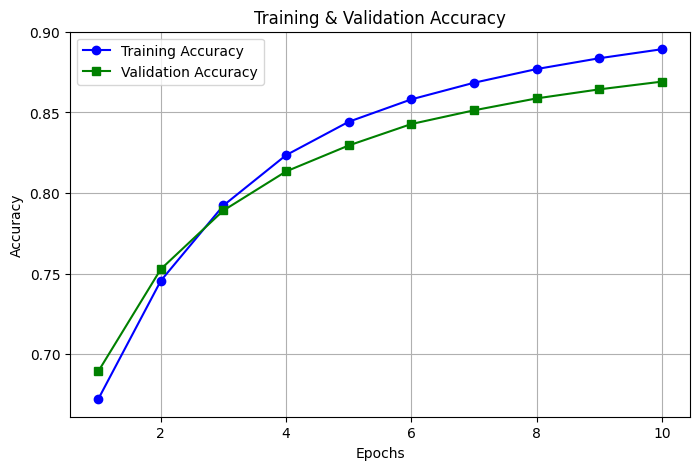

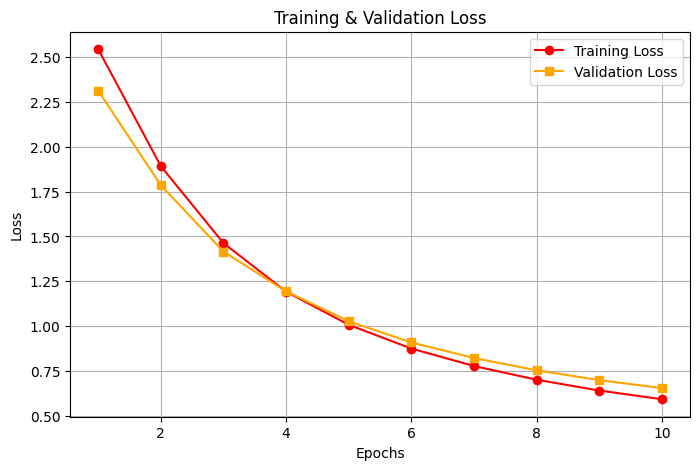

In [18]:
import matplotlib.pyplot as plt

def plot_metrics(history, metric, title, ylabel, colors, markers):
    train_metric = history.history[metric]
    val_metric = history.history["val_" + metric]
    epochs = range(1, len(train_metric) + 1)

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(epochs, train_metric, label=f"Training {title}", marker=markers[0], linestyle="-", color=colors[0])
    ax.plot(epochs, val_metric, label=f"Validation {title}", marker=markers[1], linestyle="--", color=colors[1])
    ax.set_xlabel("Epochs")
    ax.set_ylabel(ylabel)
    ax.set_title(f"Training vs Validation {title}")
    ax.legend()
    ax.grid(True)
    plt.show()

plot_metrics(history, "accuracy", "Accuracy", "Accuracy", colors=["blue", "green"], markers=["o", "s"])

plot_metrics(history, "loss", "Loss", "Loss", colors=["red", "orange"], markers=["o", "s"])

In [13]:
results = qnn_model.evaluate(X_test_tfq, y_test)
print("Test Accuracy:", results[1])


879/879 [==============================] - 8s 9ms/step - loss: 0.6551 - accuracy: 0.8691
Test Accuracy: 0.8691

